In [46]:
import pandas as pd
tax = pd.read_csv('/users/lakshmipriyanka/downloads/603/Real_Property_Taxes.csv')

In [47]:
crime=pd.read_csv('/users/lakshmipriyanka/downloads/603/Crime_and_Safety__2015__data.csv')

In [48]:
tax.head()

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941619, -76.65109034)"
1,5918064,5918,064,26,380,3429 SHANNON DR,18X91-9,2801.01,139.55,PRINCIPAL RESIDENCE,1356.5,09/29/2018,Belair-Edison,Notheastern,13.0,"(39.3229146, -76.56235554)"
2,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941951, -76.65099026)"
3,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942111, -76.65094166)"
4,0001006,0001,006,15,370,2035 W NORTH AVE,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942277, -76.65089166)"


In [49]:
tax.drop(['PropertyID','Block','Sect', 'Lot', 'Ward', 'AmountDue','AsOfDate','LotSize','Location' ],axis=1,inplace=True)

In [50]:
tax.head()

,PropertyAddress,CityTax,StateTax,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict
0,2043 W NORTH AVE,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
1,3429 SHANNON DR,2801.01,139.55,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0
2,2039 W NORTH AVE,472.08,23.52,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
3,2037 W NORTH AVE,472.08,23.52,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
4,2035 W NORTH AVE,247.28,12.32,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0


In [51]:
tax.isna().any()

PropertyAddress     True
CityTax             True
StateTax            True
ResCode            False
Neighborhood        True
PoliceDistrict      True
CouncilDistrict     True
dtype: bool

In [52]:
tax=tax.dropna()

In [53]:
tax=tax.reset_index()
del tax['index']

In [54]:
tax.head()

,PropertyAddress,CityTax,StateTax,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict
0,2043 W NORTH AVE,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
1,3429 SHANNON DR,2801.01,139.55,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0
2,2039 W NORTH AVE,472.08,23.52,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
3,2037 W NORTH AVE,472.08,23.52,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0
4,2035 W NORTH AVE,247.28,12.32,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0


In [55]:
tax.isna().any()

PropertyAddress    False
CityTax            False
StateTax           False
ResCode            False
Neighborhood       False
PoliceDistrict     False
CouncilDistrict    False
dtype: bool

In [56]:
tax['TotalTax'] = tax['StateTax'] + tax['CityTax']
tax.drop(['StateTax', 'CityTax'],axis = 1, inplace=True)

In [57]:
tax.head()

,PropertyAddress,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict,TotalTax
0,2043 W NORTH AVE,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0,1168.20
1,3429 SHANNON DR,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2940.56
2,2039 W NORTH AVE,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0,495.60
3,2037 W NORTH AVE,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0,495.60
4,2035 W NORTH AVE,NOT A PRINCIPAL RESIDENCE,Easterwood,Western,7.0,259.60


In [58]:
crime.isna().any()

the_geom                                                                 False
OBJECTID                                                                 False
Community Statistical Areas (CSAs)                                       False
Part 1 Crime Rate per 1,000 Residents                                    False
Violent Crime Rate per 1,000 Residents                                   False
Property Crime Rate per 1,000 Residents                                  False
Juvenile Arrest Rate per 1,000 Juveniles                                 False
Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles            False
Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles               False
Rate of 911 Calls for Service for Shootings per 1,000 Residents          False
Rate of Gun Homicides per 10,000 Residents                               False
Rate of 911 Calls for Service for Common Assaults per 1,000 Residents    False
Rate of 911 Calls for Service for Narcotics per 1,00

In [59]:
crime.head()

,the_geom,OBJECTID,Community Statistical Areas (CSAs),"Part 1 Crime Rate per 1,000 Residents","Violent Crime Rate per 1,000 Residents","Property Crime Rate per 1,000 Residents","Juvenile Arrest Rate per 1,000 Juveniles","Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles","Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles","Rate of 911 Calls for Service for Shootings per 1,000 Residents","Rate of Gun Homicides per 10,000 Residents","Rate of 911 Calls for Service for Common Assaults per 1,000 Residents","Rate of 911 Calls for Service for Narcotics per 1,000 Residents","Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents","Adult Arrest Rate per 1,000 Adults",Shape__Area,Shape__Length
0,MULTIPOLYGON (((-76.598249582828 39.3541564623...,20,Greater Govans,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764,2.269850e+07,22982.125715
1,MULTIPOLYGON (((-76.52969396034 39.35653169125...,24,Hamilton,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675,4.519110e+07,27712.111092
2,MULTIPOLYGON (((-76.573052627685 39.3539091042...,37,Northwood,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106,5.274327e+07,38889.894591
3,MULTIPOLYGON (((-76.638802781968 39.3069621725...,43,Sandtown-Winchester/Harlem Park,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,2.367209e+07,20987.143306
4,MULTIPOLYGON (((-76.677916539956 39.3400168652...,13,Dorchester/Ashburton,50.313932,12.557271,36.738503,10.933558,2.523129,2.523129,2.630239,0.593925,55.913796,23.502461,50.229085,13.747564,3.411828e+07,27136.075712


In [60]:
crime.rename(columns={'Part 1 Crime Rate per 1,000 Residents': 'CrimeRate'}, inplace=True)
crime.rename(columns={'Violent Crime Rate per 1,000 Residents': 'ViolentCrimeRate'}, inplace=True)
crime.rename(columns={'Property Crime Rate per 1,000 Residents': 'PropertyCrimeRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate per 1,000 Juveniles': 'JuvenileArrestRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles': 'JuvenileViolentOffenses'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles': 'JuvenileDrugOffenses'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Shootings per 1,000 Residents': '911Shootings'}, inplace=True)
crime.rename(columns={'Rate of Gun Homicides per 10,000 Residents': 'GunHomicides'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Common Assaults per 1,000 Residents': '911CommonAssaults'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Narcotics per 1,000 Residents': '911Narcotics'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents': '911AutoAccidents'}, inplace=True)
crime.rename(columns={'Adult Arrest Rate per 1,000 Adults': 'AdultArrestRate'}, inplace=True)

In [61]:
crime.drop(['the_geom', 'OBJECTID', 'Shape__Area', 'Shape__Length','AdultArrestRate','911AutoAccidents','JuvenileArrestRate','ViolentCrimeRate','JuvenileViolentOffenses'],axis=1, inplace=True)

In [62]:
crime.head()

,Community Statistical Areas (CSAs),CrimeRate,PropertyCrimeRate,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics
0,Greater Govans,48.965453,37.262429,4.329004,3.183223,0.748994,66.473177,81.546672
1,Hamilton,47.531149,37.148131,0.000000,1.461314,0.153822,44.839255,22.458083
2,Northwood,42.300066,30.583428,0.000000,1.021450,0.120171,32.866671,19.527729
3,Sandtown-Winchester/Harlem Park,72.435553,44.978518,14.554275,9.667025,1.208378,116.071429,220.797530
4,Dorchester/Ashburton,50.313932,36.738503,2.523129,2.630239,0.593925,55.913796,23.502461


In [63]:
c = crime['Community Statistical Areas (CSAs)'].str.split('/').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
c.name = 'Neighborhood'
del crime['Community Statistical Areas (CSAs)']
crime = crime.join(c)
crime=crime.reset_index()
del crime['index']

In [64]:
crime.head()

,CrimeRate,PropertyCrimeRate,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,Neighborhood
0,48.965453,37.262429,4.329004,3.183223,0.748994,66.473177,81.546672,Greater Govans
1,47.531149,37.148131,0.000000,1.461314,0.153822,44.839255,22.458083,Hamilton
2,42.300066,30.583428,0.000000,1.021450,0.120171,32.866671,19.527729,Northwood
3,72.435553,44.978518,14.554275,9.667025,1.208378,116.071429,220.797530,Sandtown-Winchester
4,72.435553,44.978518,14.554275,9.667025,1.208378,116.071429,220.797530,Harlem Park


In [65]:
final = pd.merge(tax, crime, on = 'Neighborhood')
final.head()

,PropertyAddress,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict,TotalTax,CrimeRate,PropertyCrimeRate,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics
0,3429 SHANNON DR,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2940.56,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
1,3811 LYNDALE AVE,NOT A PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2133.44,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
2,3305 RAMONA AVE,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2423.72,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
3,3307 RAMONA AVE,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2475.64,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
4,3311 RAMONA AVE,PRINCIPAL RESIDENCE,Belair-Edison,Notheastern,13.0,2423.72,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614


In [66]:
final.isna().any()

PropertyAddress         False
ResCode                 False
Neighborhood            False
PoliceDistrict          False
CouncilDistrict         False
TotalTax                False
CrimeRate               False
PropertyCrimeRate       False
JuvenileDrugOffenses    False
911Shootings            False
GunHomicides            False
911CommonAssaults       False
911Narcotics            False
dtype: bool

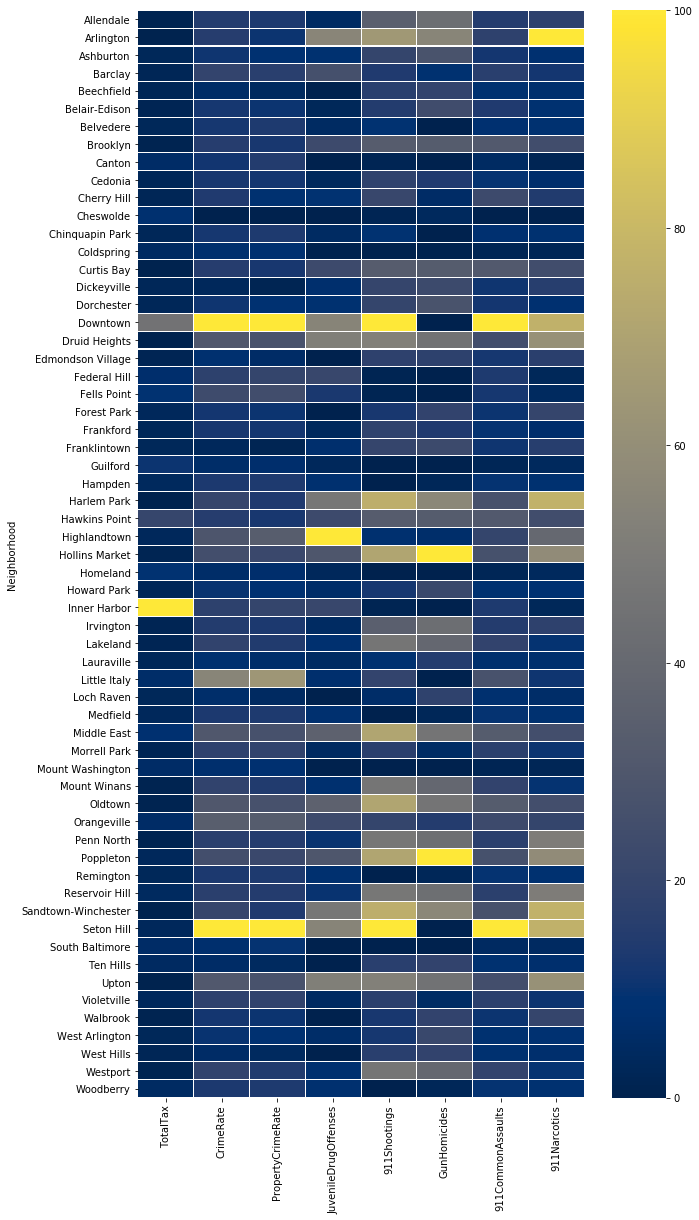

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
neighbor_heatmap = final[['Neighborhood','TotalTax', 'CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']]
neighbor_heatmap = neighbor_heatmap.groupby('Neighborhood').mean()
neighbor_heatmap_cpy = neighbor_heatmap.copy()
col_names2 = ['TotalTax', 'CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']
features2 = neighbor_heatmap[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
neighbor_heatmap_cpy[col_names2]= features2
fig, ax = plt.subplots(figsize=(10,20)) 
sns.heatmap(neighbor_heatmap_cpy, cmap='cividis', linewidths=0.05,ax=ax)
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [71]:
final['PropertyAddress'] = LE.fit_transform(final['PropertyAddress'])
final['ResCode'] = LE.fit_transform(final['ResCode'])
final['Neighborhood'] = LE.fit_transform(final['Neighborhood'])
final['PoliceDistrict'] = LE.fit_transform(final['PoliceDistrict'])

In [72]:
final.head()

,PropertyAddress,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict,TotalTax,CrimeRate,PropertyCrimeRate,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics
0,36277,1,5,4,13.0,2940.56,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
1,43196,0,5,4,13.0,2133.44,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
2,33977,1,5,4,13.0,2423.72,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
3,34058,1,5,4,13.0,2475.64,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614
4,34241,1,5,4,13.0,2423.72,52.537896,39.389068,0.876808,2.009646,0.516766,65.227377,24.919614


In [73]:
from sklearn.model_selection import train_test_split
x = final.drop(['CrimeRate'],axis=1)
y = final['CrimeRate']

In [74]:
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
lm = linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
predictions=lm.predict(x_test)

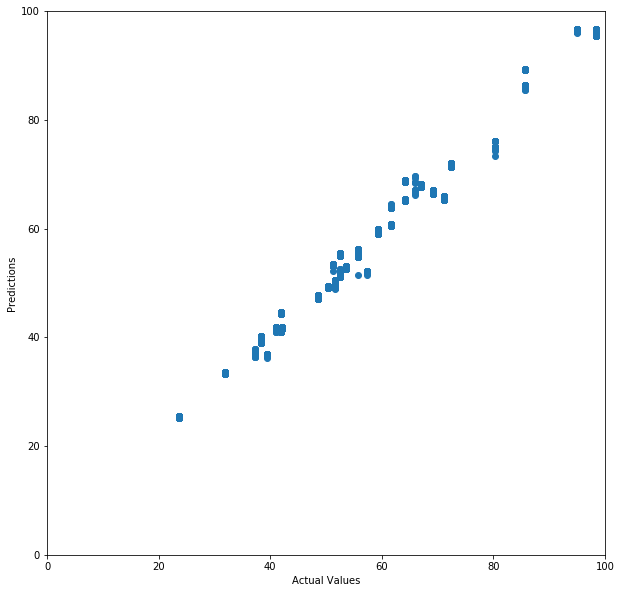

In [75]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [76]:
import numpy as np
from sklearn import metrics
rms=np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [77]:
rms

1.9617159332990595

In [78]:
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.44 %.


In [79]:
x_test[0:5]

,PropertyAddress,ResCode,Neighborhood,PoliceDistrict,CouncilDistrict,TotalTax,PropertyCrimeRate,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics
39145,23172,1,35,6,10.0,3162.40,45.652479,2.328289,6.040174,0.842815,84.983846,28.093833
13726,55599,0,34,7,8.0,287.92,43.842881,1.549587,4.501449,0.924955,68.570019,51.674169
66608,73169,0,13,2,6.0,335.12,35.603715,0.000000,0.193498,0.000000,16.447368,7.546440
6468,5888,0,47,8,9.0,141.60,57.609123,9.025271,9.044436,2.162800,114.431773,168.108533
22269,24634,0,59,6,10.0,1248.44,45.652479,2.328289,6.040174,0.842815,84.983846,28.093833


In [80]:
y_test[0:5]

39145    69.110830
13726    59.320466
66608    41.021672
6468     85.725521
22269    69.110830
Name: CrimeRate, dtype: float64

In [81]:
predictions[0:5].tolist()

[66.46793764721005,
 59.89364539910505,
 41.31057132647994,
 85.8798450842144,
 67.12778566522096]

/Users/lakshmipriyanka/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lakshmipriyanka/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


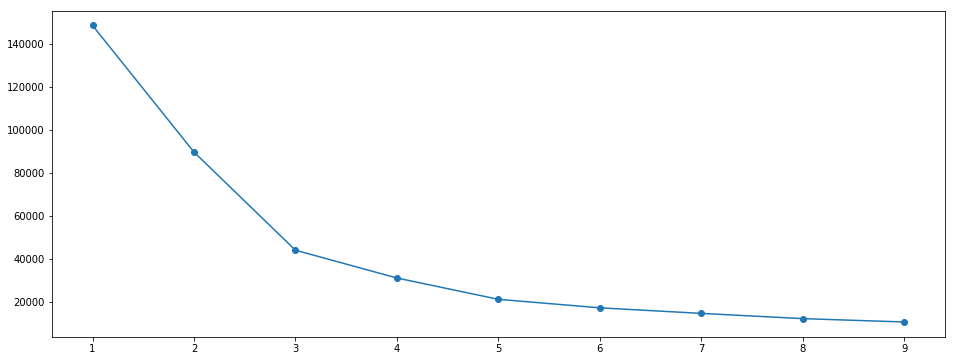

In [82]:
from sklearn.cluster import KMeans
X = final[['CrimeRate', 'Neighborhood']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

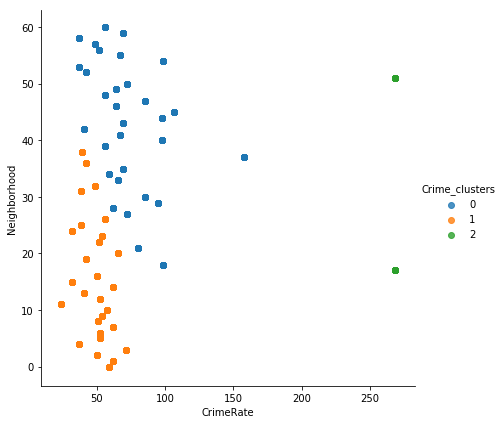

In [83]:
X = final[['CrimeRate', 'Neighborhood']]
clusters = KMeans(3)  
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

final['Crime_clusters'] = clusters.labels_
final.head()
final.sort_values(by=['Crime_clusters'],ascending = True)
X.head()
sns.lmplot('CrimeRate' ,'Neighborhood', data=final,
        hue = "Crime_clusters",
        fit_reg=False, height = 6 );